# K-Means Clustering

We are looking at the IRIS dataset, which has 4 columns of data.
The columns are: sepal length, sepal width, petal length, and petal width. These corresponds to certain measurements of flowers.
Objective: to cluster the data into K groups using the data and K-Means.

In [1]:
# Importing the libraries
import numpy as np # Numerical Calculations
import pandas as pd # Data Ingestions and Manipulations
import matplotlib.pyplot as plt # Visualizations
from sklearn import datasets

In [2]:
# Step 1: Load iris dataset
iris = datasets.load_iris() # returns a dictionary data type
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names) # convert to a table (dataframe)
iris_df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [3]:
# Step 2: Find optimal k to use for k-means (Elbow Method)
from sklearn.cluster import KMeans

# WCSS: Within Cluster Sum of Squares
wcss = []

# We need to run the algo for some values of k to figure out which K to choose
# Let's do it for k between 1 to 20 inclusive

trial_k_values = range(1,21)

for i in trial_k_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(iris_df) # running k-means for all values of k
    wcss.append(kmeans.inertia_) #inertia_ is where k-means store the WCSS value


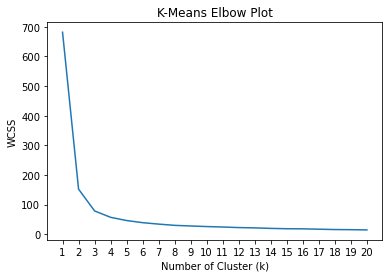

In [22]:
# Plot the elbow plot

plt.plot(trial_k_values, wcss)
plt.title("K-Means Elbow Plot")
plt.xlabel('Number of Cluster (k)')
plt.ylabel('WCSS')
plt.xticks(trial_k_values)
plt.show()

You will see that there are 2 elbows from the plot above: k = 2 and k = 3. Study has shown that in general, it's better to select the elbow with the lower WCSS.

In [23]:
# We have chose the value of k as 3
# Let's train our k-means algorithm with this k value

kmeans = KMeans(n_clusters = 3)
kmeans_model = kmeans.fit(iris_df)

In [24]:
y_kmeans = kmeans_model.predict(iris_df) # this is the Cluster each datapoint is allocated

In [25]:
# Add the above to the original table/dataframe to see the data
iris_df['Cluster'] = y_kmeans
iris_df.head(15)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


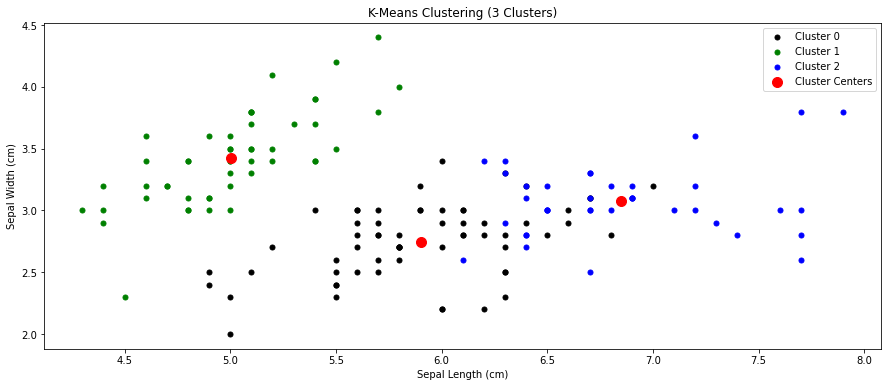

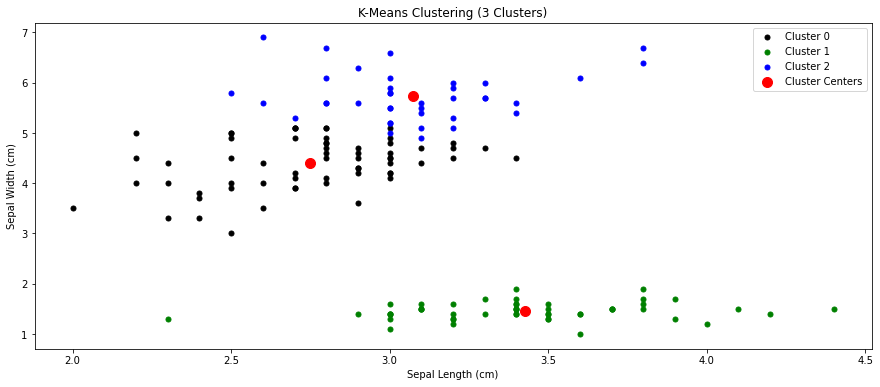

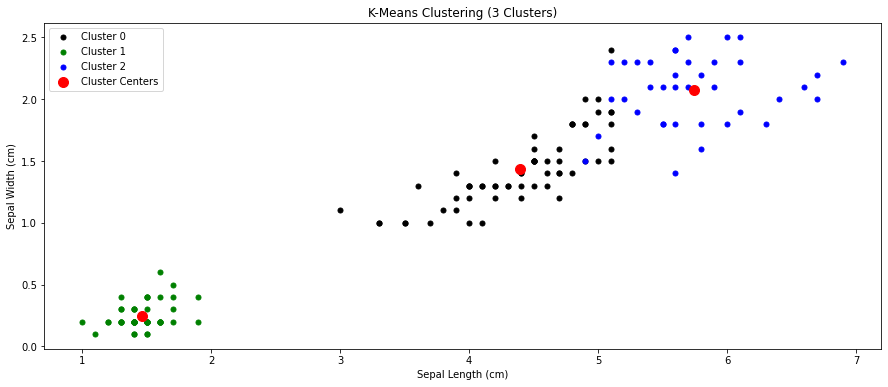

In [10]:
# Visualize the clusters
# We have 4 columns of data, but we cannot plot 4D
# But we can plot 2D or 3D Data

# iloc stands for index location, which is used to extract the values from the dataframe without the indices
# [:,range(0,4)] refers to all the rows (:) across these columns' indices: range(0,4)
x = iris_df.iloc[:,range(0,4)].values # x is a list of list

# Plot the clusters
# The meaning of x[y_kmeans == 0, 0]:
# Looking at [a,b], a is the index of the row (or condition for the rows to satisfy)
# and b is the index of the column (or condition for the columns to satisfy)

colors = ['black','green', 'blue']
for j in range(0,3):
    # Define the size of plot
    plt.figure(figsize=(15,6)) # figsize(x,y)
    for i in range(0,3):
        plt.scatter(x[y_kmeans == i, j], x[y_kmeans == i, j+1], c=colors[i], s= 25, label='Cluster ' + str(i))

    # Plot the cluster centroids/center
    cluster_centers = kmeans_model.cluster_centers_
    plt.scatter(cluster_centers[:,j], cluster_centers[:,j+1], c='red', s=100, label="Cluster Centers")

    plt.xlabel('Sepal Length (cm)')
    plt.ylabel('Sepal Width (cm)')
    plt.title('K-Means Clustering (3 Clusters)')
    plt.legend()
    plt.show()